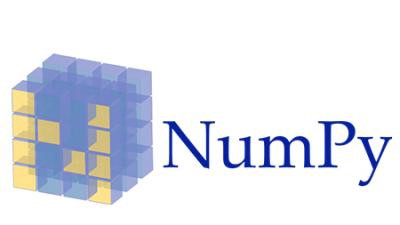

# Introducción a NumPy

NumPy es uno de los principales packages para cálculo numérico en Python. Es el backend de librerías como Pandas, Matplotlib, Statmodels, Scikit-learn, entre otras. Sus características principales son:

* Cálculos numéricos eficientes con primitivas en C
* Collections eficientes con operaciones vectorizadas
* Una API para operaciones de álgebra lineal
* Una API en C para conectar NumPy con librerías escritas en C, C++ o FORTRAN.

## Instalamos y cargamos la librería

In [1]:
#!pip install numpy

In [2]:
import numpy as np
import sys

## Performance y beneficios

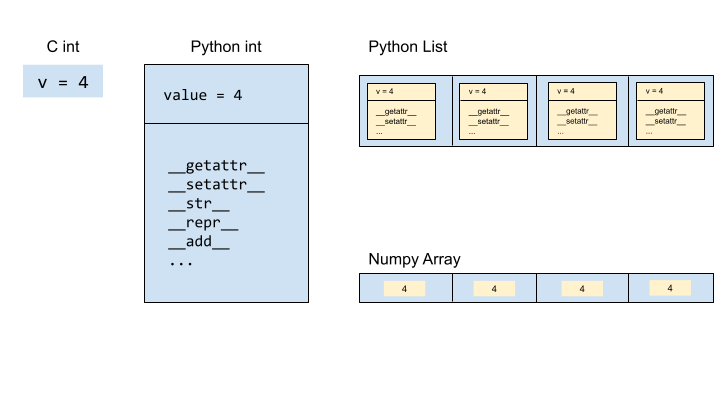

* Todo en Python es un objeto, incluído los números, por lo tanto las listas ocupan mucho más espacio que los arrays en NumPy. Las operaciones de lectura en NumPy son por lo tanto sustancialmente más rápidas.
* Los arrays son de tipo fijo a diferencia de las listas. Al no existir type checking se agilizan las operaciones.
* NumPy almacena los elementos de un array en posiciones contiguas de memoria a diferencia de las listas de python.
* Vectorization, Indexing y Broadcasting.

In [3]:
x = [1, 2, 3]

In [4]:
sys.getsizeof(x)

80

In [5]:
dir(1)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [6]:
#y = np.array([1, 2, 3])
y = np.array([1, 2, 3], dtype = np.int8)

En Python, no podemos modificar el tipo de dato de la lista. En casos donde se trabaja con datasets de billones de entradas, donde el rango de valores de alguna columna está limitado (ej: edad ~ >0 & <110), es útil poder asignar el tipo de dato óptimo.  NumPy nos permite entre otras cosas estas configuraciones.

In [7]:
y.itemsize * y.size

3

El array de NumPy, como se puede observar, tiene un tamaño significativamente inferior. Esto se debe a que en Python, cada elemento de una lista contiene la siguiente estructura:
* Size
* Reference Count
* Object Type
* Object Value

### Memoria

Python no garantiza que los elementos de una listan estén en posiciones de memoria contiguas a diferencia de NumPy. Por lo tanto, para una lista Python debe almacenar punteros a las direcciones de memoria de cada uno de sus elementos. Contrariamente, en NumPy es solo necesario almacenar la referencia al primer elemento, el tipo de dato y la cantidad de elementos.

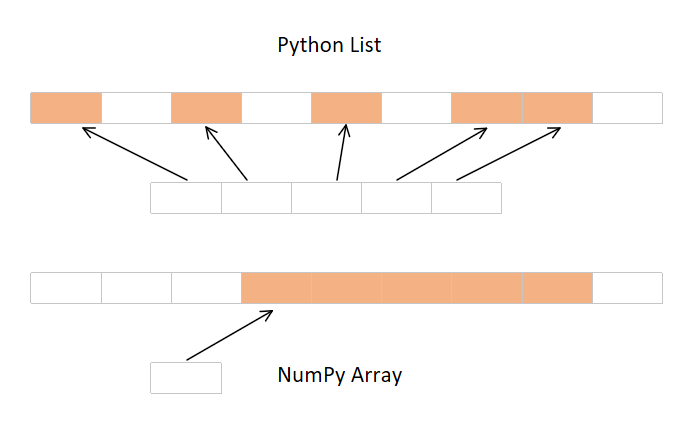

Con NumPy podemos aprovechar el SIMD (Single Instruction Multiple Data) Vector Processing Unit que realiza operaciones sobre todos los valores al mísmo tiempo si están en posiciones contiguas de memoria. Por otro lado, se tiene un uso más efectivo de Cache ya que se tiene un acceso a los datos más rápido. Más información sobre [NumPy y SIMD](https://numpy.org/neps/nep-0038-SIMD-optimizations.html)

### Vectorización

>"This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact seen in any kind of numerical computations." ([Fuente](https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/ch04.html))

In [8]:
from timeit import timeit

In [9]:
def dot_product(list1, list2):
    dot = 0
    for i,j in zip(list1, list2):
        dot += i*j
    return dot

In [10]:
list1 = [i for i in range(1000000)]
list2 = [i for i in range(1000000)]
arr1 = np.array([i for i in range(1000000)])
arr2 = np.array([i for i in range(1000000)])
setup = 'from __main__ import dot_product, list1, list2, arr1, arr2; import numpy as np'
print(timeit('dot_product(list1, list2)', setup=setup, number=10))
print(timeit('np.dot(arr1, arr2)', setup=setup, number=10))

1.3097595999999998
0.005607400000000151


## Bibliografía

* [NumPy Docs](https://numpy.org/doc/stable/user/quickstart.htm)
* [NumPy Array Programming](https://realpython.com/numpy-array-programming/)
* [How Fast Numpy Really is and Why?](https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347)
* [FreeCodeCamp - Intro to NumPy](https://www.freecodecamp.org/learn/data-analysis-with-python#numpy)